In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
"""
Input the unique ID
"""
UNIQUE_ID = "3:3"

In [3]:
train_data = np.load(f"/mdfsvc/SDMS/data/numpy/receive_checker_train_combined_data_{UNIQUE_ID}.npy")

In [4]:
# Define column names
columns = ["exnm", "code", "type", "T_class", "receive_count"]

# Convert train data to DataFrame
train_df = pd.DataFrame(train_data, columns=columns)

# Display train data
train_df.head(10)

,exnm,code,type,T_class,receive_count
0,1,1,1,645,27
1,1,2,1,645,22
2,1,3,1,645,24
3,1,4,1,645,18
4,1,5,1,645,5
5,1,6,1,645,8
6,1,7,1,645,18
7,1,8,1,645,9
8,1,9,1,645,9
9,1,10,1,645,1


In [5]:
anomaly_data_exists = True
try:
    anomaly_data = np.load(f"/mdfsvc/SDMS/data/numpy/receive_checker_anomly_combined_data_{UNIQUE_ID}.npy")

    if anomaly_data.size <= 0:
        anomaly_data_exists = False
except FileNotFoundError:
    anomaly_data_exists = False

anomaly_data_exists

True

In [6]:
# Perform PCA(3D)
pca = PCA(n_components=3)
scaler = StandardScaler()
X = scaler.fit_transform(train_data)
train_data_pca = pca.fit_transform(X)

columns = ["Com1", "Com2", "Com3"]
train_pca_df = pd.DataFrame(train_data_pca, columns=columns)
train_pca_df.head()

,Com1,Com2,Com3
0,1.614092,-0.347034,-1.473705
1,1.438148,-0.302823,-1.536207
2,1.375614,-0.351231,-1.516262
3,1.183468,-0.293789,-1.590542
4,0.877912,-0.143728,-1.747268


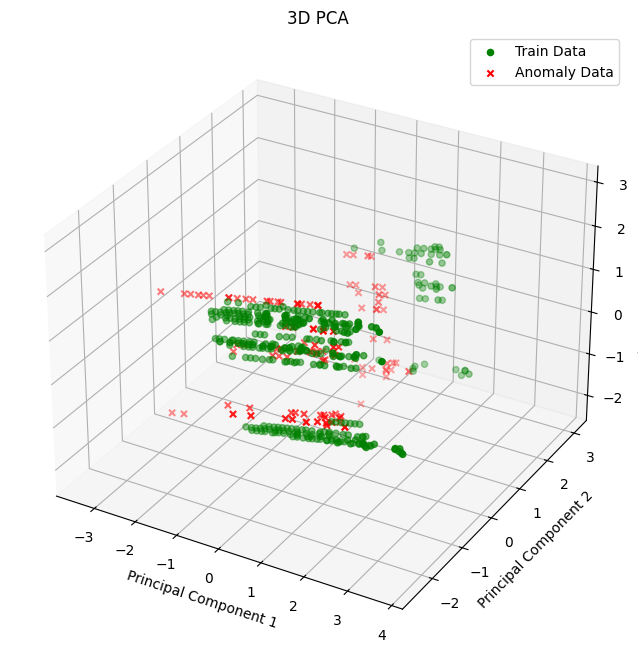

In [7]:
# Plot train data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_data_pca[:, 0], train_data_pca[:, 1], zs=train_data_pca[:, 2], c='green', marker='o', lw=1, label='Train Data')

# Plot anomaly data if exists
if anomaly_data_exists:
    XX = scaler.fit_transform(anomaly_data)
    anomaly_data_pca = pca.transform(XX)
    ax.scatter(anomaly_data_pca[:, 0], anomaly_data_pca[:, 1], anomaly_data_pca[:, 2], c='red', marker='x', label='Anomaly Data')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA')
plt.legend()
plt.show()

In [8]:
# Perform PCA(2D)
pca = PCA(n_components=2)
scaler = StandardScaler()
X = scaler.fit_transform(train_data)
train_data_pca = pca.fit_transform(X)

columns = ["Com1", "Com2"]
train_pca_df = pd.DataFrame(train_data_pca, columns=columns)
train_pca_df.head()

,Com1,Com2
0,1.614092,-0.347034
1,1.438148,-0.302823
2,1.375614,-0.351231
3,1.183468,-0.293789
4,0.877912,-0.143728


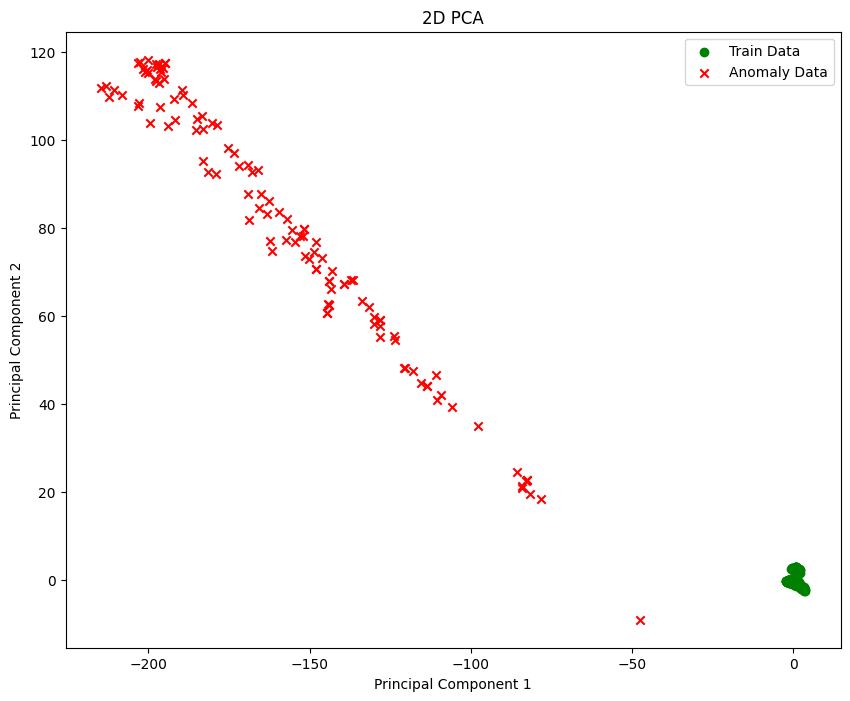

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(train_data_pca[:, 0], train_data_pca[:, 1], c='green', marker='o', lw=1, label='Train Data')

# Plot anomaly data if exists
if anomaly_data_exists:
    anomaly_data_pca = pca.transform(anomaly_data)
    plt.scatter(anomaly_data_pca[:, 0], anomaly_data_pca[:, 1], c='red', marker='x', label='Anomaly Data')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA')
plt.legend()
plt.show()